In [37]:
import random
import numpy as np
import math
from sphere_fit import fit_sphere
import matplotlib.pyplot as plt
import math
from matplotlib.lines import Line2D

In [38]:
def generate_sphere_points(noise =0.0):
    x0 = random.uniform(0, 500)
    y0 = random.uniform(0, 500)
    z0 = random.uniform(0, 500)

    r = random.uniform(20, 100)
    n = random.randint(4, 20)

    points = []
    for _ in range(n):
        theta = random.uniform(0, 2 * math.pi)     
        phi = math.acos(random.uniform(0, 1))       

        x = x0 + r * math.sin(phi) * math.cos(theta) + np.random.normal(0, noise)
        y = y0 + r * math.sin(phi) * math.sin(theta) + np.random.normal(0, noise)
        z = z0 + r * math.cos(phi) + np.random.normal(0, noise)

        points.append((x, y, z))

    return points, r, x0, y0, z0



In [39]:

points, r, x0, y0, z0 = generate_sphere_points(np.random.uniform(0, 5))

print(f"Center Point: ({x0:.2f}, {y0:.2f}, {z0:.2f})")
print(f"Radius: {r:.2f}")
print(f"Number of Points: {len(points)}")
print("Points on the Sphere Surface:")
for point in points:
    print(f"({point[0]:.2f}, {point[1]:.2f}, {point[2]:.2f})")


Center Point: (100.29, 491.49, 215.27)
Radius: 55.99
Number of Points: 9
Points on the Sphere Surface:
(49.24, 488.74, 240.60)
(106.12, 438.99, 230.06)
(154.29, 501.24, 225.86)
(138.50, 449.89, 218.36)
(122.22, 543.13, 229.57)
(87.48, 541.85, 247.33)
(118.46, 538.77, 244.77)
(110.60, 436.40, 232.09)
(95.51, 438.15, 224.59)


In [40]:
def total_pos_error(center, x0, y0, z0):
    ''' Returns the Euclidean distance between the estimated center and the true center '''
    return np.linalg.norm(center - np.array([x0, y0, z0]))

def total_radius_error(radius, r):
    ''' Returns the absolute difference between the estimated radius and the true radius '''
    return abs(radius - r)

### Visualize the data above

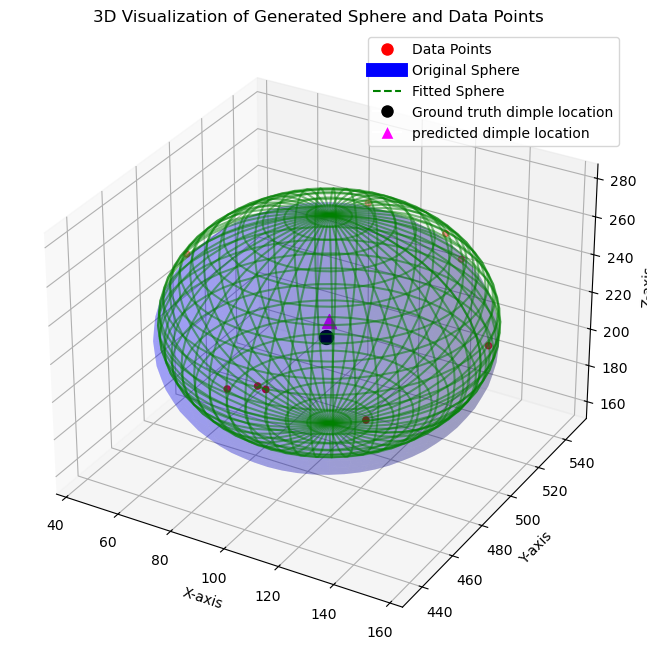

True Center: (100.2948, 491.4881, 215.2733)
True Radius: 55.9882

Estimated Center: (101.0593, 492.1239, 223.4808)
Estimated Radius: 55.2397
Sum of Squared Residuals: 1.4371e+01

Total Position Error: 8.2675
Total Radius Error: 0.7485


In [41]:

center, radius, residuals = fit_sphere(points)

x_points = [p[0] for p in points]
y_points = [p[1] for p in points]
z_points = [p[2] for p in points]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_points, y_points, z_points, color='r', label='Measurements')
ax.scatter(x0, y0, z0, color='black', marker='o', s=100, label='Ground truth dimple location')
ax.scatter(center[0], center[1], center[2], color='magenta', marker='^', s=100, label='predicted dimple location')


u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x_sphere = x0 + r * np.cos(u) * np.sin(v)
y_sphere = y0 + r * np.sin(u) * np.sin(v)
z_sphere = z0 + r * np.cos(v)
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.2, label='Ground Truth')

x_fit_sphere = center[0] + radius * np.cos(u) * np.sin(v)
y_fit_sphere = center[1] + radius * np.sin(u) * np.sin(v)
z_fit_sphere = center[2] + radius * np.cos(v)
ax.plot_wireframe(x_fit_sphere, y_fit_sphere, z_fit_sphere, color='g', alpha=0.5, label='Fitted Sphere')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Visualization of Generated Sphere and Data Points')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Data Points',
                          markerfacecolor='r', markersize=10),
                   Line2D([0], [0], linestyle='-', markerfacecolor='b', color='b', label='Original Sphere', linewidth=10),
                   Line2D([0], [0], linestyle='--', color='g', label='Fitted Sphere'),
                   Line2D([0], [0], marker='o', color='w', label='Ground truth dimple location',
                          markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='^', color='w', label='predicted dimple location',
                          markerfacecolor='magenta', markersize=10)]

ax.legend(handles=legend_elements)


plt.show()

print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
print(f"True Radius: {r:.4f}")
print(f"\nEstimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
print(f"Estimated Radius: {radius:.4f}")
print(f"Sum of Squared Residuals: {residuals:.4e}\n")

print(f"Total Position Error: {total_pos_error(center, x0, y0, z0):.4f}")
print(f"Total Radius Error: {total_radius_error(radius, r):.4f}")

In [42]:
i = 0
avg_p_error = 0
avg_r_error = 0
while(i < 1000):
    i += 1
    points, r, x0, y0, z0 = generate_sphere_points(random.uniform(0, 5))
    center, radius, residual_sum = fit_sphere(points)

    p_error = total_pos_error(center, x0, y0, z0)
    r_error = total_radius_error(radius, r)

    avg_p_error += p_error
    avg_r_error += r_error

    print(f"True Center: ({x0:.4f}, {y0:.4f}, {z0:.4f})")
    print(f"True Radius: {r:.4f}")
    print(f"Estimated Center: ({center[0]:.4f}, {center[1]:.4f}, {center[2]:.4f})")
    print(f"Estimated Radius: {radius:.4f}")

    print("Trial ", i, ":")
    print(f"Total Position Error: {p_error:.4f}")
    print(f"Total Radius Error: {r_error:.4f}\n")
    
print(f"Position Error: {avg_p_error:.4f}")
print(f"Radius Error: {avg_r_error:.4f}")
print(i)


print(f"Average Position Error: {avg_p_error/i:.4f}")
print(f"Average Radius Error: {avg_r_error/i:.4f}\n")


True Center: (194.8309, 326.6121, 411.9928)
True Radius: 77.1556
Estimated Center: (193.0698, 325.9829, 412.3950)
Estimated Radius: 78.1635
Trial  1 :
Total Position Error: 1.9128
Total Radius Error: 1.0079

True Center: (18.3708, 450.4674, 87.9803)
True Radius: 61.3714
Estimated Center: (18.3851, 450.3946, 88.5661)
Estimated Radius: 61.2713
Trial  2 :
Total Position Error: 0.5905
Total Radius Error: 0.1000

True Center: (45.8384, 396.0140, 120.6750)
True Radius: 46.4742
Estimated Center: (33.8008, 398.4697, 74.7232)
Estimated Radius: 89.3878
Trial  3 :
Total Position Error: 47.5658
Total Radius Error: 42.9136

True Center: (46.3205, 223.1396, 135.3502)
True Radius: 81.0500
Estimated Center: (46.8633, 223.0444, 135.1648)
Estimated Radius: 81.6002
Trial  4 :
Total Position Error: 0.5814
Total Radius Error: 0.5502

True Center: (173.5257, 159.8832, 23.6026)
True Radius: 46.5523
Estimated Center: (173.0196, 159.2987, 24.6360)
Estimated Radius: 46.4525
Trial  5 :
Total Position Error: 1.29